In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import collections
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
X = np.array([
    [1, 8759], 
    [1, 10132],
    [1, 12078],
    [1, 16430]])
y = np.array([487, 612,866,1030])

In [3]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [4]:
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

iterations = 28
alpha = 0.001

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

theta: [-3.44592561e+139 -4.32713055e+143]
cost: 1.3930711337585138e+295


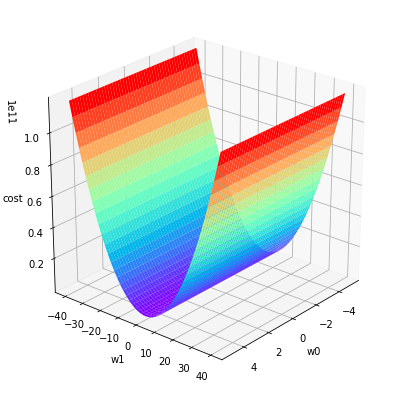

In [5]:
Xs, Ys = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-40, 40, 50))
Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))

ax = fig.gca(projection="3d")
ax.set_xlabel(r'w0')
ax.set_ylabel(r'w1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

plt.show()

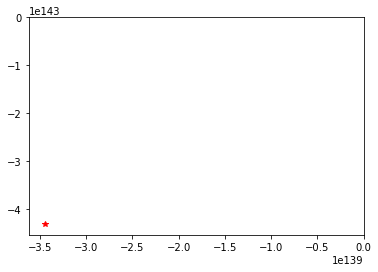

In [6]:
ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')

plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))
plt.show()